In [11]:
conda env list


# conda environments:
#
base                  *  C:\Users\dell\anaconda3pro


Note: you may need to restart the kernel to use updated packages.


In [12]:
conda info --envs


# conda environments:
Note: you may need to restart the kernel to use updated packages.

#
base                  *  C:\Users\dell\anaconda3pro



In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

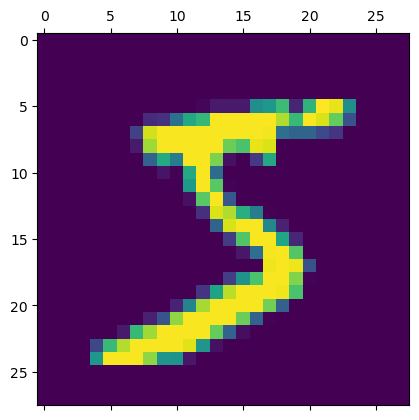

In [4]:
plt.matshow(x_train[0])

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [10]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.6858 - accuracy: 0.8249 - val_loss: 0.3692 - val_accuracy: 0.8995
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3484 - accuracy: 0.9044 - val_loss: 0.3025 - val_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2985 - accuracy: 0.9165 - val_loss: 0.2697 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2679 - accuracy: 0.9250 - val_loss: 0.2493 - val_accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2455 - accuracy: 0.9312 - val_loss: 0.2362 - val_accuracy: 0.9338
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2276 - accuracy: 0.9368 - val_loss: 0.2172 - val_accuracy: 0.9385
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2127 - accuracy: 0.9407 - val_loss: 0.2058 - val_ac

In [11]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1792 - accuracy: 0.9485
loss=0.179
Accuracy=0.948


<function matplotlib.pyplot.show(close=None, block=None)>

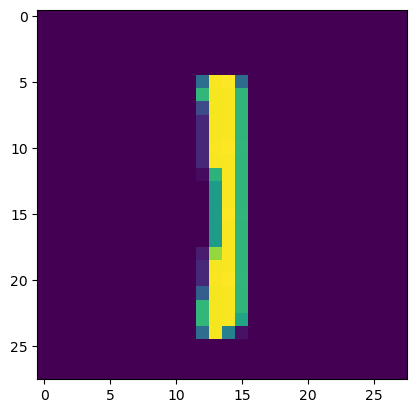

In [12]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [13]:
test_predict = model.predict(x_test)
test_predict_labels = np.argmax(test_predict,axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('confusion matrix of the test set:\n',confusion_matrix)

313/313 [==============================] - 2s 5ms/step
confusion matrix of the test set:
 tf.Tensor(
[[ 963    0    0    2    0    5    7    1    2    0]
 [   0 1114    3    2    1    1    3    2    9    0]
 [   7    3  972   12   11    2    3   10   10    2]
 [   2    2   15  958    0    9    0   10   10    4]
 [   1    1    7    0  943    0    7    2    2   19]
 [  10    2    3   28    5  814   11    3   10    6]
 [   9    3    3    2   10    9  921    1    0    0]
 [   2    8   19    8    5    1    0  969    2   14]
 [   4    4    4   21   11   11    9    8  898    4]
 [   8    9    2   14   28    2    1   10    2  933]], shape=(10, 10), dtype=int32)
